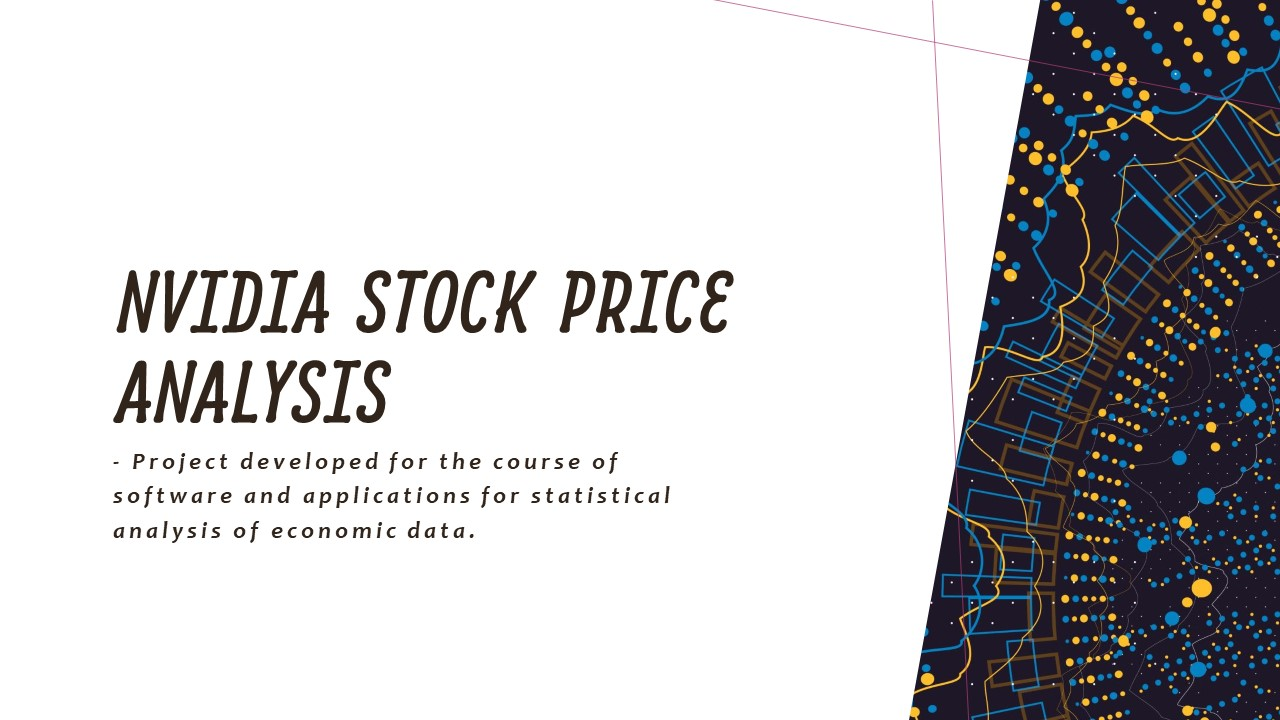

For Project Day to Day Progress and other Documentation, References visit:

* [NVIDIA Stock Price Analysis](https://www.notion.so/NVIDIA-Stock-Price-Analysis-d8b6ef648d674c498a626e3c00f6c52e?pvs=4)
* [GitHub Repo](https://github.com/Mushtari-Khan-unina/TSA_Final)

# Importing

## Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.0 MB/s eta 0:00:00


In [4]:
!pip install pycaret pmdarima #Library to run TSForecastingExperiment and Auto ARIMA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from arch import arch_model

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

## Dataset

The dataset for the NVIDIA stock Prices was imported from [Yahoo Finance](https://finance.yahoo.com/quote/NVDA/history/)

In [7]:
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'
data = pd.read_csv(file_path) # importing the dataset from the file path
data.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000

In [8]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
2910  2024-06-14  129.960007  132.839996  128.320007  131.880005  131.880005   
2911  2024-06-17  132.990005  133.729996  129.580002  130.979996  130.979996   
2912  2024-06-18  131.139999  136.330002  130.690002  135.580002  135.580002   
2913  2024-06-20  139.800003  140.759995  129.520004  130.779999  130.779999   
2914  2024-06-21  127.120003  130.630005  124.300003  126.570000  126.570000   

         Volume  
2910  309320400  
2911  288504400  
2912  294335100  
2913  517768400  
2914  649445800

# About Data

In [9]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


About the attributes:

1. Open Price: The starting price of the stock for each trading day.
2. High Price: The highest price reached during the trading day.
3. Low Price: The lowest price during the trading day.
4. Close Price: The final price at which the stock traded at the end of the trading day.
5. Adjusted Close Price: This adjusts the close price for corporate actions like dividends, stock splits, etc.
6. Volume: The number of shares traded each day.

Note: the prices are in USD


In [10]:
#descriptive statistics of all columns
data.describe()

Open         High          Low        Close    Adj Close  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     12.203867    12.424575    11.971037    12.212220    12.184745   
std      19.324402    19.672322    18.933069    19.333715    19.338275   
min       0.287250     0.290750     0.284250     0.287250     0.265173   
25%       0.646500     0.657000     0.633500     0.647125     0.630227   
50%       4.743000     4.817500     4.659750     4.738500     4.698981   
75%      15.091000    15.345750    14.817875    15.112000    15.095000   
max     139.800003   140.759995   130.690002   135.580002   135.580002   

             Volume  
count  2.915000e+03  
mean   4.499863e+08  
std    2.473682e+08  
min    4.564400e+07  
25%    2.912780e+08  
50%    3.978650e+08  
75%    5.422780e+08  
max    3.692928e+09

By using describe function from the pandas library, we can derive insights on the NVIDIA stock data. The mean stock prices across all the variables hover around 12. The price range of our stock data ranges from 0.28 to 139.8, suggesting potential increase in the stock price over the years and the presence of trend in the data.

In [11]:
#Checking if there are any missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values. Yet it is to be considered that the date column if set frequency of 'D' can raise a lot of missing values as the data is of Business days i.e trading days

In [12]:
# Creating subplots on all columns in dataset
fig = make_subplots(
    rows=6,
    cols=1,
    shared_xaxes=False,
    vertical_spacing=0.05,
    subplot_titles=('Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted Close Price', 'Volume')  # Titles for each subplot
)
fig.add_trace(go.Scatter(x=data.index, y=data['Open'], name='Open'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['High'], name='High'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Low'], name='Low'), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close'), row=4, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], name='Adj Close'), row=5, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Volume'], name='Volume', mode='lines'), row=6, col=1)
fig.update_layout(
    height=1200, width=1000,
    title_text="NVIDIA Stock Attributes",
    showlegend=True
)
fig.update_annotations(font_size=12)
fig.show()


The make_subplots function to create multiple interactive subplots using Plotly library was used to generate six plots on the attributes in our dataset. This allows us to have a detailed examination of the attributes behaviour over the time. [Subplots Doc.](https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html)

 The Open, High, Low, Close, and Adjusted Close prices all show significant upward trends, especially in the latter part of the series, and when plotted against the Date after 2020.


## Candle Stick Charts

In [13]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='NVIDIA Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

Using candlestick chart a detailed visualization of NVIDIA stock's price movements over time are plotted above. Each candlestick represents the open, high, low, and close prices for a specific trading period. Green candlesticks indicate bullish periods where the closing price was higher than the opening price, while red candlesticks indicate bearish periods where the closing price was lower. The length of the wicks shows the volatility within each trading period. [Candlestick Charts](https://plotly.com/python/candlestick-charts/#simple-candlestick-with-pandas)


To have a more closer look the chart was modified to plot the chart for a specific year in time and further the behaviour of the stock over the month. [Customizing Candlestick](https://python-graph-gallery.com/554-custom-candle-stick-plotly/)

In [14]:
data_graph = data.copy()
# Ensure the 'Date' column is datetime and set it as the index
data_graph['Date'] = pd.to_datetime(data_graph['Date'])
data_graph.set_index('Date', inplace=True)

# Ask the user for a specific year
year = int(input("Enter the year you want to analyze (e.g., 2020): "))

# Filter the data for the selected year
year_data = data_graph[data_graph.index.year == year]

# Create a daily candlestick chart for the selected year
fig_daily = go.Figure(data=[go.Candlestick(x=year_data.index,
                                           open=year_data['Open'],
                                           high=year_data['High'],
                                           low=year_data['Low'],
                                           close=year_data['Close'])])

fig_daily.update_layout(title=f'NVIDIA Stock Candlestick Chart for {year} (Daily)',
                        xaxis_title='Date',
                        yaxis_title='Price')

fig_daily.show() # Day wise

# Resample data to monthly for the selected year
monthly_data = year_data.resample('M').agg({'Open': 'first',
                                            'High': 'max',
                                            'Low': 'min',
                                            'Close': 'last'})

# Create a monthly candlestick chart for the selected year
fig_monthly = go.Figure(data=[go.Candlestick(x=monthly_data.index,
                                             open=monthly_data['Open'],
                                             high=monthly_data['High'],
                                             low=monthly_data['Low'],
                                             close=monthly_data['Close'])])

fig_monthly.update_layout(title=f'For the Months in the year {year}',
                          xaxis_title='Date',
                          yaxis_title='Price')

fig_monthly.show() #month wise in the selected year

Enter the year you want to analyze (e.g., 2020): 2015


Slicing the data and selecting only the Date and Adj. Close Column

## Volume

In [15]:
Volume_data = data[['Date', 'Volume']].copy()

fig = px.line(Volume_data, x='Date', y='Volume', title='NVIDIA Volume over the years')

fig.show()

In [16]:
#Checking if the Volume is stationary
res = adfuller(Volume_data.Volume)
if res[1] < 0.05:
  print('The data of {} is stationary series'.format(Volume_data.Volume.name))
else:
  print('The data of {} is not stationary series'.format(Volume_data.Volume.name))

The data of Volume is stationary series


The Volume attribute in the the data was found to be stationary through ADF test. Further details about ADF test can be found in stationary tests part of this notebook.

In [17]:
#Feature extraction

Volume_data['Date'] = pd.to_datetime(data.Date)
Volume_data = Volume_data.set_index('Date')


#Extracting the day, month and year from the Date index
Volume_data['year'] = Volume_data.index.year
Volume_data['month'] = Volume_data.index.month
Volume_data['day'] = Volume_data.index.day

In [18]:
# Create a facet grid plot using Plotly
fig = px.line(Volume_data, x='month', y='Volume', facet_col='year', facet_col_wrap=4, title='NVIDIA Volumes Monthwise data for the Year')

# Show the plot
fig.show()

In the year 2017 the Volume data i.e the shares traded were the highest indicating highest trading activity in the history of NVIDIA's stock for the month of June (month=6).

In [19]:
Volume_data['quarter'] = Volume_data.index.quarter

# Aggregate the data by quarters
quarterly_data = Volume_data.groupby(['year', 'quarter']).sum().reset_index()

# Create an interactive grouped bar plot using Plotly
fig = px.bar(quarterly_data, x='quarter', y='Volume', color='year', barmode='group', title='NVidia Volume by Quarter and Year')

# Show the plot
fig.show()

When breaked down to quarter wise the performance of the stock for Quarters 1 and 2 over the years has been almost same and Quarter 3 was fund to be low. Another significant insight as seen earlier is for the year 2017, being the highest bandwidth i.e perfoming well than others.

# Adj Close

In [20]:
# Selecting  only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy() #copy of the original data

nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True) #Making the Date Column as Index

print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


In [21]:
nvidia_data.tail()

Adj Close
Date                  
2024-06-14  131.880005
2024-06-17  130.979996
2024-06-18  135.580002
2024-06-20  130.779999
2024-06-21  126.570000

The data starts from November 20, 2012, providing a historical perspective on the stock's adjusted closing prices till June 21, 2024. The Adj price has seen a potential increase in its value.

In [22]:
# Creating an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)
fig.show()

The plot shows a clear upward trend in NVIDIA's stock price over the period.
The stock price remained relatively low and stable until around 2016.
After 2016, there is a noticeable increase in stock price, particularly from the year 2020. The stock price experienced fluctuations and volatility, particularly visible after 2020. Sharp rises and falls are observed, indicating periods of high volatility.The most significant increase in stock price appears to have occurred in the last couple of years, with a potential rise observed around 2023-2024.

## Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

For decomposition of the our NVIDIa data we can use the following methods,

1. seasonal_decompose is a classical method that decomposes a time series using moving averages. It assumes that the seasonality is constant over time (additive or multiplicative).

2. STL (Seasonal-Trend decomposition using Loess) is more flexible and robust, allowing for changing seasonality over time. It uses locally weighted regression to decompose the series.

<Figure size 800x550 with 0 Axes>

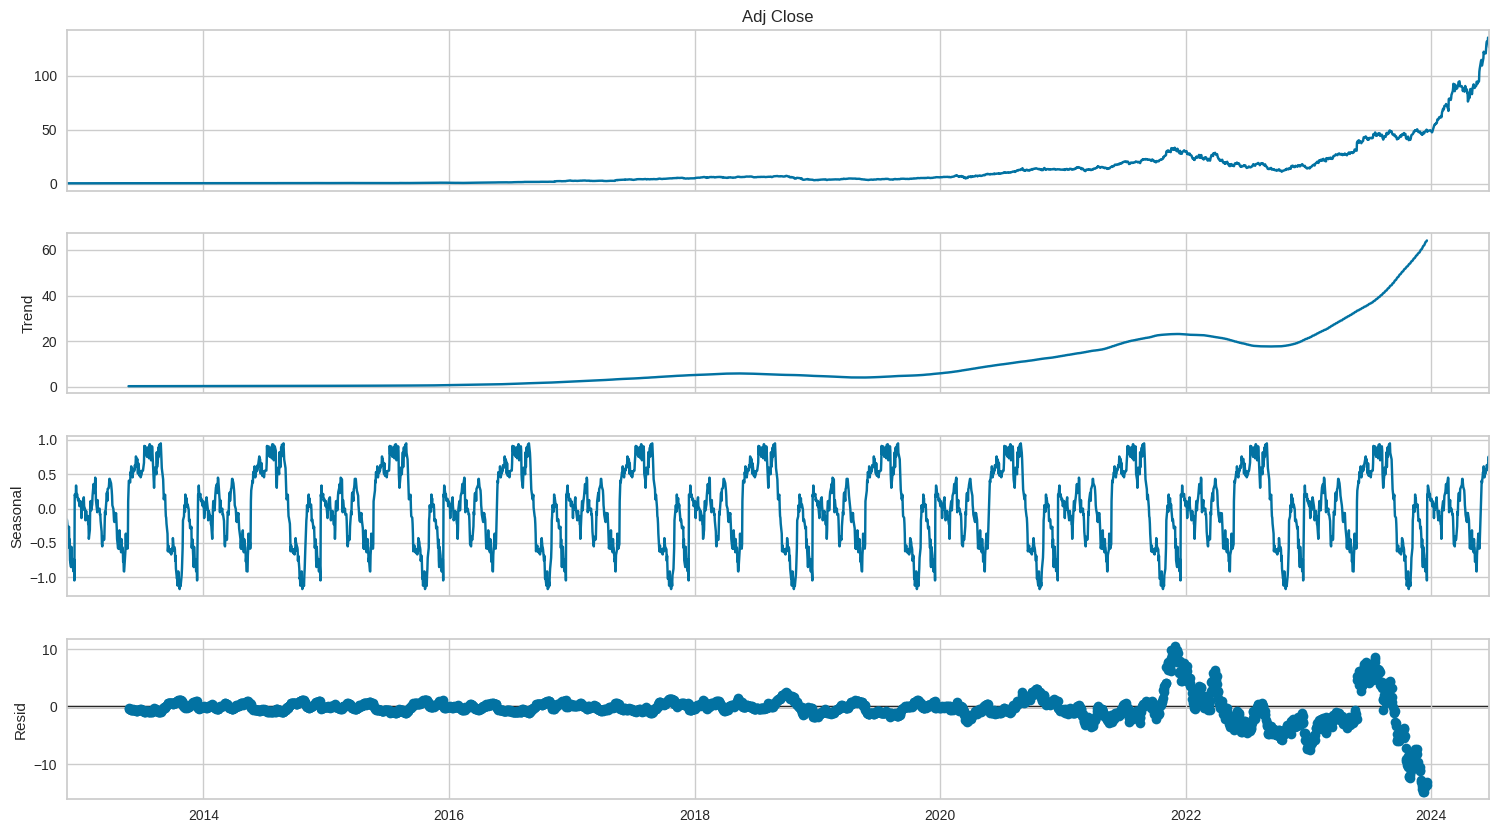

In [24]:
#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
# For yearly seasonality in daily stock data the period is set to 252
#Assuming 252 trading days per year
result = seasonal_decompose(nvidia_data['Adj Close'], period=252)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

As STL can handle both additive and multiplicative seasonality and can adapt to changes in the seasonal component over time, and can provide more reliable decomposition when data is highly variable we also try deccomposition using it.[STL](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html)

In [25]:
# Seting the period for STL decomposition
period = 252  # For yearly seasonality in daily stock data

stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extracting the components from the STL result
trend = result.trend
seasonal = result.seasonal
residual = result.resid


# Creating a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual
})

components_df['Model'] = 'STL'

# Storing All the columns
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual']]


In [26]:
components_df

Model       Date   Adj Close      Trend   Seasonal   Residual
Date                                                                    
2012-11-20   STL 2012-11-20    0.265173   0.254753  -0.027693   0.038113
2012-11-21   STL 2012-11-21    0.272789   0.255243  -0.020859   0.038404
2012-11-23   STL 2012-11-23    0.274636   0.255734  -0.023072   0.041974
2012-11-26   STL 2012-11-26    0.279482   0.256224  -0.013936   0.037194
2012-11-27   STL 2012-11-27    0.280636   0.256715  -0.006761   0.030682
...          ...        ...         ...        ...        ...        ...
2024-06-14   STL 2024-06-14  131.880005  91.438932  28.992735  11.448338
2024-06-17   STL 2024-06-17  130.979996  91.672006  28.109307  11.198684
2024-06-18   STL 2024-06-18  135.580002  91.905174  30.926024  12.748805
2024-06-20   STL 2024-06-20  130.779999  92.138435  27.954535  10.687028
2024-06-21   STL 2024-06-21  126.570000  92.371790  24.855291   9.342919

[2915 rows x 6 columns]

In [27]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,  # Space between the plots
                    subplot_titles=('Trend', 'Seasonality', 'Residuals'))

fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=trend, name='Trend'),
    row=1, col=1
)

# Seasonality subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=seasonal, name='Seasonality'),
    row=2, col=1
)

# Residuals subplot
fig.add_trace(
    go.Scatter(x=nvidia_data.index, y=residual, name='Residuals'),
    row=3, col=1
)

fig.update_layout(height=800, width=1000,
                  title_text="Decomposition of NVIDIA Stock Adj Price Data",
                  showlegend=False)
fig.show()

## Rolling Stats

In [28]:
# Handling the missing values
nvidia_data = nvidia_data.interpolate()

#creating the function to call over the data multiple times
def plot_rolling_statistics(series, window=12):
    # Calculate rolling mean and standard deviation
    rolmean = series.rolling(window=window).mean()
    rolstd = series.rolling(window=window).std()

    # Create a Plotly graph object
    fig = go.Figure()

    # Add the original series to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=series,
        mode='lines',
        name='Original',
        line=dict(color='blue')
    ))

    # Add the rolling mean to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolmean,
        mode='lines',
        name='Rolling Mean',
        line=dict(color='red')
    ))

    # Add the rolling standard deviation to the plot
    fig.add_trace(go.Scatter(
        x=series.index,
        y=rolstd,
        mode='lines',
        name='Rolling Std',
        line=dict(color='black')
    ))

    # Update plot layout
    fig.update_layout(
        title='Rolling Mean & Standard Deviation',
        xaxis_title='Date',
        yaxis_title='Value',
        width=800,  # Adjust width
        height=400   # Adjust height
    )


    fig.show()


# Original Series
plot_rolling_statistics(nvidia_data['Adj Close'])

The alignment of the rolling mean with the original series confirms the presence of a strong and consistent upward trend in the stock prices and is a smoothen the noise giving a clear view of the trend in our data.  The increasing trend and volatility suggest that the series is non-stationary.

Moving head to prove the non stationarity of the data we can use the ADF or KPSS stationarity tests and decide how we can stabilize the mean and variance through transformation.

## Stationarity Tests

ADF Test: If the p-value is below a significance level of 0.05, we can reject the null hypothesis that the series has a unit root i.e., non-stationary. [Statsmodels adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [29]:
#Creating a function to apply ADF test and also print the critical values
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

print("ADF Test on Original Series:")
adf_test(nvidia_data['Adj Close'])

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837


The results of the ADF test strongly suggest that the original series of NVIDIA adjusted closing prices is non-stationary.

The p-value is 1.0, which is significantly higher than our conventional significance level of 0.05.

This is consistent with the visual observations of the rolling statistics, which showed a clear trend and increasing volatility.

KPSS Test: If the p-value is below a significance level of 0.05 we reject the null hypothesis that the series is stationary. [Statsmodels KPSS](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html)

In [30]:
#Creating a Function to apply KPSS Test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value}')

print("KPSS Test on Original Series:")
kpss_test(nvidia_data['Adj Close'])

KPSS Test on Original Series:
KPSS Statistic: 5.136646551283202
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


The KPSS statistic 5.14 is significantly higher than the critical values at the 1%, 2.5%, 5%, and 10% levels. This suggests that the test statistic is in the rejection region, which is greater than these critical values, indicating the null hypothesis that the series is stationary can be rejected.

## Transformation

To make the Adj Close price stationary we apply transformations on it.

In [31]:
from pmdarima.arima.utils import ndiffs

The ndiffs function from the pmdarima library helps determine the optimal number of differences needed to make a time series stationary. The function uses different statistical tests, such as the Augmented Dickey-Fuller (ADF) test, to compute the number of differencing required. [Pmdarima ndiffs](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html)

In [32]:
ndiffs(nvidia_data['Adj Close'], test="adf")

1

This means that, according to the ADF test, applying a first-order differencing (d=1) is sufficient to make the NVIDIA adjusted closing prices data stationary.

In [33]:
# Log Transformation
nvidia_data['log_Close'] = np.log(nvidia_data['Adj Close'])
plot_rolling_statistics(nvidia_data['log_Close'])

The log transformation appears to have reduced the trend and the stable rolling standard deviation indicates reduced volatility in the log-transformed Adj Close price. , making the series closer to stationarity. This is a good pre-processing step before applying further transformations like differencing to achieve full stationarity.

In [34]:
# ADF of Log Transformed data
print("ADF Test on Log Transformed Series:")
adf_test(nvidia_data['log_Close'])

ADF Test on Log Transformed Series:
ADF Statistic: 0.5932017973202582
p-value: 0.9874468610192699
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


After applying a log transformation, it's essential to re-test the series for stationarity using tests like ADF to check if stationarity was achieved. As stationarity requires both constant mean and variance over time, the ADF test on log transformed data still rejects the non stationarity.

When Log Transformation Might Be Enough?

Log transformation can be sufficient to make the data stationary if:

* The primary issue with the original series is variance instability rather than a trend.
* The log-transformed series exhibits no significant trend or seasonality.
* The log-transformed series passes stationarity tests without further transformations.

In [35]:
# Applying differencing on the log transformed data
nvidia_data['log_diff_Close'] = nvidia_data['log_Close'].diff().dropna()
plot_rolling_statistics(nvidia_data['log_diff_Close'])

Trend Removal: The rolling mean is stable around zero, indicating the trend has been successfully removed.

Variance Stabilization: The rolling standard deviation is stable, indicating that the variance is now more consistent over time.

These observations suggest that the log-differencing transformation has successfully made the series stationary.

In [36]:
# Checking and removing any infinite values which can result from improper data handling
nvidia_data['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data['log_diff_Close'].dropna(inplace=True) #Drpping NAN values

Dropping all the NaN values is essential which were generated during differencing the series.

Again Applying the ADF test to check stationarity.

In [37]:
# Applying ADF on Log Differenced data to cross verify stationarity
print("ADF Test on Log Differenced Series:")
adf_test(nvidia_data['log_diff_Close'])

ADF Test on Log Differenced Series:
ADF Statistic: -19.0951709457048
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046


The ADF statistic is -19.095, which is much lower than the critical values at the 1%, 5%, and 10% levels. This suggests that the test statistic is in the rejection region, which means we reject the null hypothesis of non-stationarity.

The results of the ADF test strongly suggest that the log-differenced series of NVIDIA adjusted closing prices is stationary. This means that the series now has a constant mean and variance over time, making it suitable for time series modeling.

In [38]:
nvidia_data

Adj Close  log_Close  log_diff_Close
Date                                             
2012-11-20    0.265173  -1.327373             NaN
2012-11-21    0.272789  -1.299057        0.028316
2012-11-23    0.274636  -1.292309        0.006748
2012-11-26    0.279482  -1.274817        0.017491
2012-11-27    0.280636  -1.270697        0.004121
...                ...        ...             ...
2024-06-14  131.880005   4.881892        0.017363
2024-06-17  130.979996   4.875045       -0.006848
2024-06-18  135.580002   4.909562        0.034517
2024-06-20  130.779999   4.873517       -0.036045
2024-06-21  126.570000   4.840796       -0.032721

[2915 rows x 3 columns]

## ARIMA

ARIMA models require the data to be stationary, meaning it should have a constant mean and variance over time. By applying both log transformation and differencing, we have already achieved stationarity. So for manual ARIMA modelling we require the p,d,q terms.

We can proceed in two ways

If we use the log transformed Adj Close Price to model the data we can set the d=1 as we have seen that first order differencing is making the data stationary from the previous sections by both ndiffs and adf test.

If we use the log differenced Adj Close price we can set the d=0 as setting d=1 again would be redundant and incorrect.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

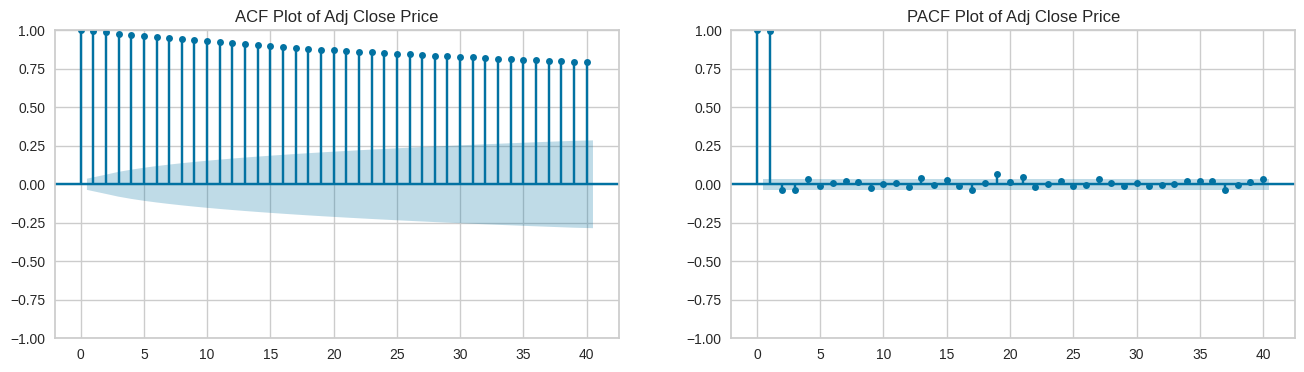

In [40]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(nvidia_data['Adj Close'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot of Adj Close Price')

# PACF plot
plot_pacf(nvidia_data['Adj Close'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF Plot of Adj Close Price')

plt.show()

lets first plot acf and pacf to obtain p and q values.

In [41]:
from statsmodels.tsa.arima.model import ARIMA

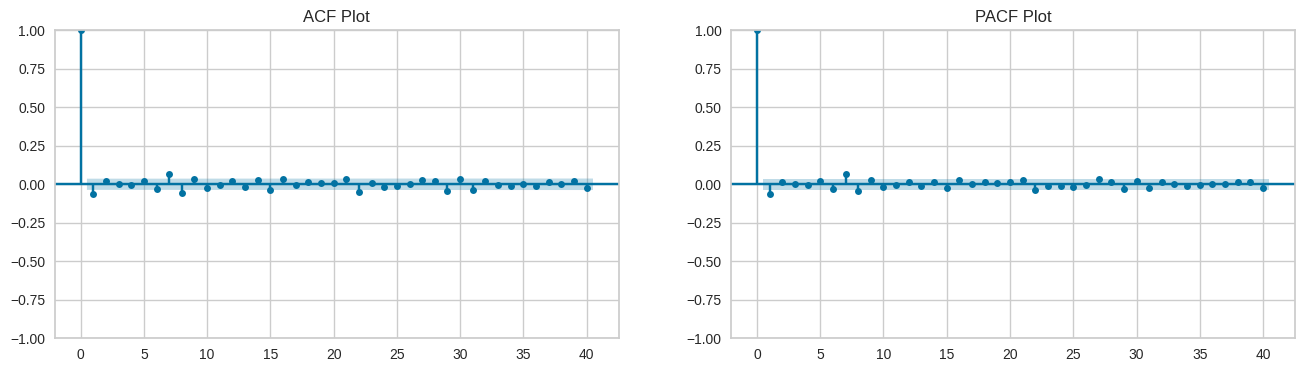

In [42]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(nvidia_data['log_diff_Close'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
plot_pacf(nvidia_data['log_diff_Close'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

**ACF Plot (Autocorrelation Function):**

> The ACF plot shows the correlation of the time series with its own lagged values.

*From the ACF plot:*

* There is a significant spike at lag 1, indicating that the first lag has a significant autocorrelation.
* Subsequent lags appear to hover around zero and do not show significant autocorrelation.

**PACF Plot (Partial Autocorrelation Function):**

> The PACF plot shows the partial correlation of the time series with its own lagged values, after removing the effect of previous lags.


*From the PACF plot:*

* Similar to the ACF plot, there is a significant spike at lag 1.
* Subsequent lags do not show significant partial autocorrelation.

In [76]:
# Fit the recommended ARIMA model on log-transformed series
model = ARIMA(nvidia_data['log_Close'], order=(1, 1, 1))
fit_model = model.fit()

# Print model summary
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              log_Close   No. Observations:                 2915
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6278.913
Date:                Tue, 02 Jul 2024   AIC                         -12551.827
Time:                        07:03:21   BIC                         -12533.895
Sample:                             0   HQIC                        -12545.367
                               - 2915                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3275      0.230     -1.421      0.155      -0.779       0.124
ma.L1          0.2740      0.236      1.162      0.245      -0.188       0.736
sigma2         0.0008   9.26e-06     84.961      0.0

The ARIMA(1, 1, 1) model on the log-transformed series provides a reasonable fit with low AIC and BIC values.

However, neither the AR(1) nor the MA(1) term is statistically significant as p>0.05 which may suggest that a different model specification could be more appropriate.

We need to explore different ARIMA model specifications to improve the fit. Thus we can use auto_arima from pmdarima to find the best ARIMA model parameters automatically.

## Auto ARIMA

Using Auto Arima to get the best Parameters

In [44]:
from pmdarima import auto_arima

When using auto_arima, it is generally best to provide the function with the original series. The auto_arima function can automatically determine the appropriate order of differencing (d) along with the p and q values. This approach leverages the power of auto_arima to find the best model for the data without manual preprocessing steps. [Auto ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

In [77]:
auto_arima_original = auto_arima(nvidia_data['Adj Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=3, max_q=3,  # Maximum p and q
                        seasonal=False,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(auto_arima_original.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8244.584, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7548.601, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=6276.610, Time=1.54 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8242.590, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=6278.589, Time=2.61 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6276.285, Time=0.87 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6278.261, Time=0.71 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6278.256, Time=1.71 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7546.619, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6257.332, Time=1.86 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6262.180, Time=1.02 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6253.323, Time=2.27 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=6

In [78]:
auto_arima_log = auto_arima(nvidia_data['log_Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=3, max_q=3,  # Maximum p and q
                        seasonal=False,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(auto_arima_log.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12561.012, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12569.598, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12569.254, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12546.426, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12568.218, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12568.098, Time=2.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12566.242, Time=3.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-12552.998, Time=0.75 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.784 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2915
Model:               SARIMAX(1, 1, 0)   Log Likelihood                6287.799
Date:                Tue, 02 Jul 2024   AIC                         -12569.598
Time:               

In [105]:
auto_arima_log_diff = auto_arima(nvidia_data['log_diff_Close'].dropna(),
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=3, max_q=3,  # Maximum p and q
                        seasonal=False,  # No seasonality for this example
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(auto_arima_log_diff.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12546.427, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12552.998, Time=0.76 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12552.616, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12552.271, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12551.827, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12550.792, Time=1.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12569.598, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12561.012, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12568.218, Time=1.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12568.098, Time=1.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12569.254, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12566.242, Time=2.72 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 12.689 seconds
                               SARIMAX Results                 

Fitting the Model

In [106]:
# Fit the recommended ARIMA model on log-transformed series
model_log = ARIMA(nvidia_data['log_Close'].dropna(), order=(1, 1, 0))
fit_model_log = model_log.fit()

# Print model summary
print(fit_model_log.summary())

                               SARIMAX Results                                
Dep. Variable:              log_Close   No. Observations:                 2915
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6278.499
Date:                Tue, 02 Jul 2024   AIC                         -12552.998
Time:                        07:31:18   BIC                         -12541.043
Sample:                             0   HQIC                        -12548.691
                               - 2915                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0542      0.012     -4.410      0.000      -0.078      -0.030
sigma2         0.0008   9.24e-06     85.158      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.08   Jarque-

* Log Likelihood: 6278.499
* AIC (Akaike Information Criterion): -12552.998
* BIC (Bayesian Information Criterion): -12541.043

The AIC and BIC values are both very low (negative), indicating a model that fits the data well while penalizing for complexity. Lower values for AIC and BIC mean the model is both accurate and not overly complex.

The ARIMA(1, 1, 0) model on the log-transformed series provides a reasonable fit with low AIC and BIC values.

The AR(1) term is statistically significant, suggesting that the first lag of the log-transformed series helps predict future values.

Variance of Residuals (sigma2): 0.0008
The variance of the residuals is very small and statistically significant, indicating a good fit.

In [107]:
# Fit the recommended ARIMA model on log-transformed series
model_log_diff = ARIMA(nvidia_data['log_diff_Close'].dropna(), order=(1, 0, 0))
fit_model_log_diff = model_log_diff.fit()

# Print model summary
print(fit_model_log_diff.summary())

                               SARIMAX Results                                
Dep. Variable:         log_diff_Close   No. Observations:                 2914
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6287.799
Date:                Tue, 02 Jul 2024   AIC                         -12569.598
Time:                        07:31:41   BIC                         -12551.666
Sample:                             0   HQIC                        -12563.139
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      4.298      0.000       0.001       0.003
ar.L1         -0.0602      0.012     -4.934      0.000      -0.084      -0.036
sigma2         0.0008   9.18e-06     85.190      0.0

Forcasting with ARIMA

In [108]:
# Forecast future values of the log-transformed series
forecast_steps = 30  # Number of steps to forecast
forecast_log = fit_model_log.forecast(steps=forecast_steps)

# Convert forecast back to original scale by exponentiation
forecast_original = np.exp(forecast_log)

# Create a date range for the forecast
forecast_dates = pd.date_range(start=nvidia_data.index[-1], periods=forecast_steps+1)

# Print the forecasted values
print("Forecasted Values (Original Scale):")
for date, value in zip(forecast_dates, forecast_original):
    print(f"{date.date()}: {value}")

Forecasted Values (Original Scale):
2024-06-21: 126.79469888931075
2024-06-22: 126.78250833326278
2024-06-23: 126.78316912124444
2024-06-24: 126.78313330157512
2024-06-25: 126.78313524326511
2024-06-26: 126.78313513801123
2024-06-27: 126.78313514371675
2024-06-28: 126.78313514340742
2024-06-29: 126.7831351434242
2024-06-30: 126.7831351434233
2024-07-01: 126.7831351434233
2024-07-02: 126.7831351434233
2024-07-03: 126.7831351434233
2024-07-04: 126.7831351434233
2024-07-05: 126.7831351434233
2024-07-06: 126.7831351434233
2024-07-07: 126.7831351434233
2024-07-08: 126.7831351434233
2024-07-09: 126.7831351434233
2024-07-10: 126.7831351434233
2024-07-11: 126.7831351434233
2024-07-12: 126.7831351434233
2024-07-13: 126.7831351434233
2024-07-14: 126.7831351434233
2024-07-15: 126.7831351434233
2024-07-16: 126.7831351434233
2024-07-17: 126.7831351434233
2024-07-18: 126.7831351434233
2024-07-19: 126.7831351434233
2024-07-20: 126.7831351434233


The forecasted values on the original scale are constant around 126.78.
This indicates a very stable future prediction with no growth or decline.

The code forecasts the next 30 steps of the log-differenced series using the fitted ARIMA model. To revert the differencing, it accumulates the forecasted log differences starting from the last observed log-transformed value, ensuring continuity in the forecast. The accumulated log forecasts are then exponentiated to convert them back to the original scale.

This was to ensure that the forecast values are back in original scale.

In [110]:
# Forecast future values of the log-differenced series
forecast_steps = 30  # Number of steps to forecast
forecast_log_diff = fit_model_log_diff.forecast(steps=forecast_steps)

# Convert forecast back to original log scale by accumulating the differenced forecast
last_log_value = nvidia_data['log_Close'].iloc[-1]
forecast_log = np.r_[last_log_value, forecast_log_diff].cumsum()

# Convert back to original scale by exponentiation
forecast_original_diff = np.exp(forecast_log[1:])  # Exclude the initial value used for cumsum

# Create a date range for the forecast
forecast_dates = pd.date_range(start=nvidia_data.index[-1], periods=forecast_steps+1)

# Print the forecasted values
print("Forecasted Values:")
for date, value in zip(forecast_dates, forecast_original_diff):
    print(f"{date.date()}: {value}")

Forecasted Values:
2024-06-21: 127.10460040469735
2024-06-22: 127.35778385151013
2024-06-23: 127.62857552639646
2024-06-24: 127.89891042067823
2024-06-25: 128.16988025054323
2024-06-26: 128.44142040138797
2024-06-27: 128.7135360631362
2024-06-28: 128.98622821471298
2024-06-29: 129.25949809197684
2024-06-30: 129.53334691802007
2024-07-01: 129.80777591945483
2024-07-02: 130.0827863254359
2024-07-03: 130.35837936772566
2024-07-04: 130.63455628069576
2024-07-05: 130.91131830133315
2024-07-06: 131.1886666692453
2024-07-07: 131.466602626666
2024-07-08: 131.74512741846078
2024-07-09: 132.0242422921326
2024-07-10: 132.30394849782735
2024-07-11: 132.58424728833944
2024-07-12: 132.86513991911747
2024-07-13: 133.14662764826986
2024-07-14: 133.4287117365704
2024-07-15: 133.711393447464
2024-07-16: 133.9946740470723
2024-07-17: 134.2785548041993
2024-07-18: 134.5630369903371
2024-07-19: 134.84812187967165
2024-07-20: 135.13381074908824


The forecasted values on the original scale show an increasing trend, starting at 127.10 and ending at 135.13.
This suggests a steady growth in the stock price over the forecast period.

The ARIMA(1, 1, 0) on log-transformed data shows no growth (flat forecast).

The ARIMA(1, 0, 0) on log-differenced data shows a clear increasing trend in the stock price, which might be more realistic given the historical upward trend of NVIDIA's stock.

Given the summaries and forecasted trends, the ARIMA(1, 0, 0) on the log-differenced series seems to be the better choice. It not only fits the data well according to AIC and BIC but also provides a more realistic forecast, showing a consistent upward trend, aligning better with the historical performance of NVIDIA's stock.

In [111]:
# Create Plotly plot
fig = go.Figure()

# Add original close price
fig.add_trace(go.Scatter(x=nvidia_data.index, y=nvidia_data['Adj Close'], mode='lines', name='Adj Close Price'))

# Add forecasted values (original scale)
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast_original_diff, mode='lines', name='Forecast', line=dict(color='red')))

# Update layout
fig.update_layout(
    title='ARIMA(1, 1, 0) Forecast on Original Scale',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price',
    showlegend=True
)

# Show plot
fig.show()

Residual analysis is essential to evaluate the adequacy of the fitted ARIMA model. We will check the residuals for the following:

* Plotting the Residuals: To visually inspect for patterns.
* ACF and PACF of Residuals: To check for remaining autocorrelation.
* Normality of Residuals: To see if the residuals follow a normal distribution.
* Heteroskedasticity: To check if the residuals have constant variance.

In [113]:
from scipy.stats import probplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

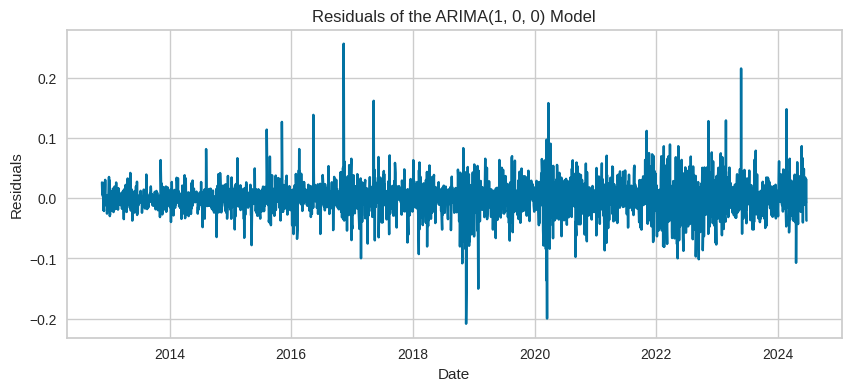

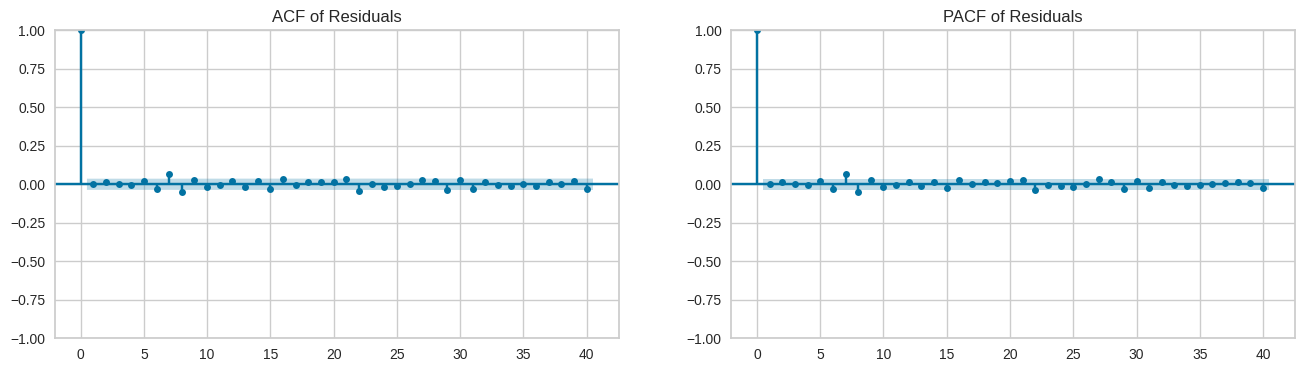

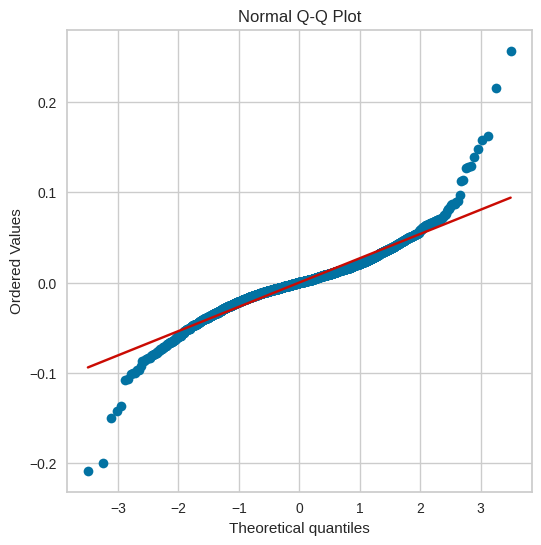

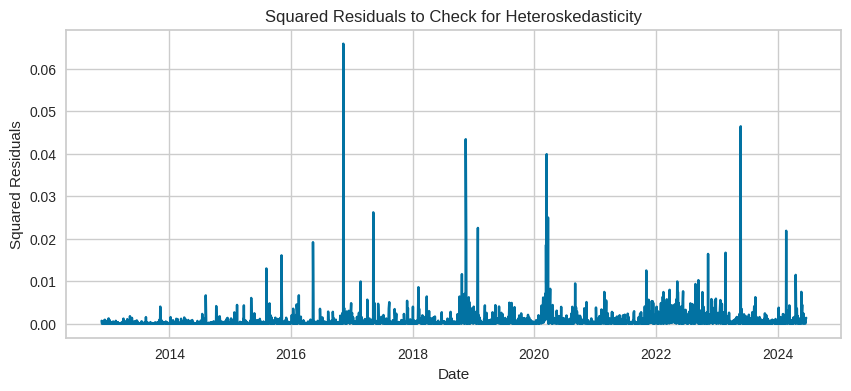

In [114]:
# Extract residuals
residuals = fit_model_log_diff.resid

# 1. Plotting the Residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of the ARIMA(1, 0, 0) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# 2. ACF and PACF of Residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(residuals, lags=40, ax=axes[0])
axes[0].set_title('ACF of Residuals')

# PACF plot
plot_pacf(residuals, lags=40, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.show()

# 3. Normality of Residuals
plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# 4. Heteroskedasticity
plt.figure(figsize=(10, 4))
plt.plot(residuals ** 2)
plt.title('Squared Residuals to Check for Heteroskedasticity')
plt.xlabel('Date')
plt.ylabel('Squared Residuals')
plt.show()

1. Residuals Plot:
Description: The residuals appear randomly scattered around zero, which is a good indication that the model has captured the underlying pattern in the data.
Observation: The residuals show some variability over time but do not exhibit clear patterns or trends.

2. ACF and PACF of Residuals:
Description: The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots show the correlations of the residuals with their own lagged values.
Observation: Both ACF and PACF plots show no significant spikes beyond the confidence intervals, indicating no remaining autocorrelation in the residuals. This suggests that the ARIMA(1, 0, 0) model has successfully captured the autocorrelations in the data.

3. Normality of Residuals:
Description: The Q-Q plot compares the quantiles of the residuals to a standard normal distribution.
Observation: The residuals deviate from the straight line, particularly at the tails. This indicates that the residuals are not perfectly normally distributed, which could impact the reliability of the model. There are some outliers that deviate significantly from the normal distribution.

4. Heteroskedasticity:
Description: The plot of squared residuals helps to check for changing variance (heteroskedasticity).
Observation: There are periods with higher variance, indicating the presence of heteroskedasticity. The variance of residuals is not constant over time, which suggests that a model capable of handling changing variance (such as a GARCH model) might be more appropriate.

Good Fit:
The ARIMA(1, 0, 0) model provides a good fit to the data as indicated by the residuals plot and the lack of autocorrelation in the ACF and PACF plots.

Non-Normality:
The residuals are not perfectly normally distributed, which could impact model reliability. This is evident from the Q-Q plot.

Heteroskedasticity:
The presence of heteroskedasticity suggests that the variance of residuals changes over time. This might require further modeling using GARCH to better capture this aspect.

## TSForecastingExperiment

In [51]:
from pycaret.time_series import TSForecastingExperiment

The NVIDIDA stock data we have considered contains the values for trading days only that is the frequency 'B'.

PyCaret doesn't support modeling for daily data with missing values, it is suggested to generate a synthetic sequence of new date column starting from the first start date. [Pycaret Working Example](https://developers.lseg.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data)

In [52]:
# Load your NVIDIA stock data
nvidia_data_exp = data

# Verify index and columns
print(nvidia_data_exp.index)  # This should print the DateTime index

RangeIndex(start=0, stop=2915, step=1)


In [53]:
nvidia_data_exp = nvidia_data_exp[['Date','Adj Close']]

In [54]:
nvidia_data_exp

Date   Adj Close
0     2012-11-20    0.265173
1     2012-11-21    0.272789
2     2012-11-23    0.274636
3     2012-11-26    0.279482
4     2012-11-27    0.280636
...          ...         ...
2910  2024-06-14  131.880005
2911  2024-06-17  130.979996
2912  2024-06-18  135.580002
2913  2024-06-20  130.779999
2914  2024-06-21  126.570000

[2915 rows x 2 columns]

In [55]:
from datetime import date, timedelta

sdate = [int(i) for i in nvidia_data_exp.Date.min().split("-")] # start date

sdate = date(sdate[0], sdate[1], sdate[2])

edate = [int(i) for i in nvidia_data_exp.Date.max().split("-")] # end date

edate = date(edate[0], edate[1], edate[2])

In [56]:
nvidia_data_exp['Index_Date'] = pd.date_range(sdate,edate-timedelta(days=1),freq='d')[:nvidia_data_exp.shape[0]]

nvidia_data_exp.index = pd.PeriodIndex(nvidia_data_exp.Index_Date, freq='D')

nvidia_data_exp = nvidia_data_exp.drop("Index_Date", axis=1)

nvidia_data_exp['Adj Close'] = nvidia_data_exp['Adj Close'].astype(float)

nvidia_data_exp.sort_index(ascending=True, inplace=True)

Code Reference for setting the date sequential [Modelling and Evaluation usin PyCaret](https://developers.lseg.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data)

In [57]:
nvidia_data_exp.head()

Date  Adj Close
Index_Date                       
2012-11-20  2012-11-20   0.265173
2012-11-21  2012-11-21   0.272789
2012-11-22  2012-11-23   0.274636
2012-11-23  2012-11-26   0.279482
2012-11-24  2012-11-27   0.280636

In [ ]:
from pycaret.time_series import TSForecastingExperiment #make sure pycaret is installed

TSForecastingExperiment() initializes the forecasting experiment and with the following simple setup on the Adj Close price data we can utilize the features of TSForecastingExperiment to gain insights on our data. [Tutorial on TSForecastingExperiment](https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Time%20Series%20Forecasting.ipynb)

In [116]:
forecast_horizon = 30 # For forecasts
# Setup experiment on original data
exp = TSForecastingExperiment()
exp.setup(data=nvidia_data_exp['Adj Close'], session_id=171, fh=forecast_horizon) #session Id a random value so used matricola

Time series specific Cross Validation and Fold generator:

Expanding Window Splitter: The training set grows with each iteration, including all data up to a certain point.
Sliding Window Splitter: Both the training and validation sets slide forward through time, maintaining a fixed window size.
Rolling Forecast Origin: Similar to the expanding window but used for multiple steps ahead forecasting.

In [117]:
# Plot diagnostics
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [59]:
#ACF, and PACF for the original data
exp.plot_model(plot="acf")
exp.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [60]:
exp.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    2915.0  
1                                       0.0  
2                                 12.184745  
3                                  4.698981  
4                                 19.338275  
5                                 373.96889  
6                                  10.32273  
7                                   2.95705  
8                                    2767.0  
9   {'alpha': 0.05, 'K': 24}    59214.83499  
10  {'alpha': 0.05, 'K': 48}  105236.912091  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}            1.0  
17           {'alpha': 0.05}       5.872963  
18           {'alpha': 0.05}      -3.432617  
19           {'alpha': 0.05}      -2.862542  
20           {'alpha': 0.05}      -2.567303  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       1.099928  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

Using the check_stats function various stat tests can be performed on the train variable i.e Adj Close. Here it clearly shows that the stationarity is false and backs up with the ADF and KPSS statistic and p values which are similar to the ones we obtained by directly performing the stationarity tests on the original data.

ADF Test on Original Series:
ADF Statistic: 5.872962520786018
p-value: 1.0
Critical Value (1%): -3.432617102137327
Critical Value (5%): -2.8625416527115592
Critical Value (10%): -2.567303208514837

 According to the above stats, the time series data of ADj Close price exhibits significant seasonality, is non-stationary, and does not follow a normal distribution. The presence of high kurtosis and skewness further supports the need for transformation or advanced modeling techniques to achieve better forecasts. Which we delt with in the Transformation section of the notebook.

### On Transformed Data

Let's try setting up the TSForecastig Expriment on transformed data to see how the diagnostics and stats change and whether they align with our previous code interpretations.

In [61]:
# Log Transformation
nvidia_data_exp['log_Close'] = np.log(nvidia_data_exp['Adj Close'])

# Log Differencing
nvidia_data_exp['log_diff_Close'] = nvidia_data_exp['log_Close'].diff().dropna()

nvidia_data_exp['log_diff_Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
nvidia_data_exp['log_diff_Close'].dropna(inplace=True)

In [62]:
forecast_horizon = 30
# Setup experiment on transformed data
exp_diff = TSForecastingExperiment()
exp_diff.setup(data=nvidia_data_exp['log_diff_Close'].dropna(), session_id=171, fh=forecast_horizon)

Recommended 'd' value is now zero as already differenced series. Sesonalities have also been reduced.

In [118]:
# Plot diagnostics, ACF, and PACF for the transformed data
exp_diff.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [64]:
exp_diff.plot_model(plot="acf")
exp_diff.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

In [65]:
exp_diff.check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                 2914.0  
1                                    0.0  
2                               0.002117  
3                               0.002105  
4                               0.028023  
5                               0.000785  
6                               8.428835  
7                               0.266275  
8                                 2897.0  
9   {'alpha': 0.05, 'K': 24}   68.688204  
10  {'alpha': 0.05, 'K': 48}  100.013113  
11  {'alpha': 0.05, 'K': 24}    0.000003  
12  {'alpha': 0.05, 'K': 48}    0.000016  
13  {'alpha': 0.05, 'K': 24}         0.0  
14  {'alpha': 0.05, 'K': 48}         0.0  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}  -19.095171  
18           {'alpha': 0.05}   -3.432602  
19           {'alpha': 0.05}   -2.862535  
20           {'alpha': 0.05}     -2.5673  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.091304  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}         0.0

Performing check_stats on transformed data gives us the insights on various stats on the Log-differenced Adj Close Price. From the stationarity test now being false and the ADF and KPSS statistics being lower than critical values it is clearly stated that data has achived stationarity.

### Model comparision

Pycaret also allows us to compare different models on time series data. We can either explicitly give a list of models to compare or use the comparemodels() function that runs model trianing on all possible models. [Pycaret Functional API](https://pycaret.gitbook.io/docs#time-series)

Computational time is quite high, yet provides us the metrics to select the best model.

In [189]:
models_to_compare = ['arima','exp_smooth','auto_arima', ]

# Compare selected models
best_model = exp.compare_models(include=models_to_compare)

Initiated  . . . . . . . . . . . . . . . . . .         09:38:14
Status     . . . . . . . . . . . . . . . . . .  Fitting 3 Folds
Estimator  . . . . . . . . . . . . . . . . . .            ARIMA

Empty DataFrame
Columns: [Model, MASE, RMSSE, MAE, RMSE, MAPE, SMAPE, R2, TT (Sec)]
Index: []

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KeyboardInterrupt: 

**auto_arima** has the lowest values for MASE (0.8045), RMSSE (0.7730), MAE (0.0215), and RMSE (0.0292), indicating it has the best overall performance among the compared models.

In [ ]:
exp.get_metrics() #to see the selection metrics

Lets train an Auto ARIMA model on our data using the previously setup of exp_diff and create_model function provided by Pycaret.

In [ ]:
a_arima = exp.create_model('auto_arima')

a_arima

As PyCaret also provides us the oppurtunity to Auto tune, we are going to use auto tune capabilities to the above trained model to improve its performance. If there is a possibility of improvement, the model will be tune its hyperparameters otherwise it will retain it's initial state

[PyCaret Documentation](https://pycaret.readthedocs.io/en/latest/api/time_series.html#pycaret.time_series.tune_model)



In [ ]:
tuned_arima = exp.tune_model(a_arima)

tuned_arima

In [ ]:
exp.plot_model(tuned_arima, plot = 'forecast') #Will plot the forecast of 30 days as set on forecast horizon during initial setup

In [ ]:
exp.plot_model(tuned_arima, plot = 'residuals')

In [ ]:
exp.predict_model(tuned_arima)

# Returns

## Calculating Returns

Analysis on returns provides us with the understanding on stocks performance.

Code references:

[Calculating Stock returns](https://www.codingfinance.com/post/2018-04-03-calc-returns-py/)

[ANALYZING STOCK RETURNS AND VOLATILITY WITH PYTHON](https://labs.sogeti.com/analyzing-stock-returns-and-volatility-with-python/)

In [147]:
nvidia_data['Returns'] = nvidia_data['Adj Close'].pct_change() #Daily Returns can be coded for monthly as well

In [148]:
nvidia_data

Adj Close  log_Close  log_diff_Close   Returns
Date                                                       
2012-11-20    0.265173  -1.327373             NaN       NaN
2012-11-21    0.272789  -1.299057        0.028316  0.028721
2012-11-23    0.274636  -1.292309        0.006748  0.006771
2012-11-26    0.279482  -1.274817        0.017491  0.017645
2012-11-27    0.280636  -1.270697        0.004121  0.004129
...                ...        ...             ...       ...
2024-06-14  131.880005   4.881892        0.017363  0.017514
2024-06-17  130.979996   4.875045       -0.006848 -0.006824
2024-06-18  135.580002   4.909562        0.034517  0.035120
2024-06-20  130.779999   4.873517       -0.036045 -0.035403
2024-06-21  126.570000   4.840796       -0.032721 -0.032191

[2915 rows x 4 columns]

In [149]:
dates = nvidia_data.index
returns = nvidia_data['Returns']

fig = go.Figure()

fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0.3, y1=0,
              line=dict(color="rgba(51, 204, 51, 0.3)"))
fig.add_shape(type="rect", x0=dates[1], x1=dates[-1], y0=0, y1=-0.2,
              line=dict(color="rgba(204, 51, 51, 0.3)"))

fig.add_trace(go.Scatter(x=dates[1:], y=returns[1:], mode='lines', name='Daily Returns'))

fig.update_layout(
    title="Nvidia Stock Daily Returns",
    xaxis_title="Date",
    yaxis_title="Returns",
    font=dict(size=20),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
    width=1800,
    height=600
)

fig.show()


From 2012 to 2024, while the returns are generally centered around zero, there are periods of increased volatility, particularly around 2016 and 2020.

The mean return appears to be relatively constant, but the variance seems to change over time, suggesting some periods of higher volatility.

This changing variance could be indicative of heteroskedasticity, which might require models like GARCH for better volatility forecasting.

This plot is crucial for understanding the volatility and risk associated with Nvidia's stock. The daily returns provide insights into the stock's performance and highlight periods of significant market activity. Such an analysis is fundamental for risk management, investment decisions, and further modeling efforts, such as volatility modeling with GARCH.

## Metrics on Returns -Working

In [150]:
# Calculating possible metrics on Returns
mean_return = nvidia_data['Returns'].mean()
volatility = nvidia_data['Returns'].std()
skewness = nvidia_data['Returns'].skew()
kurtosis = nvidia_data['Returns'].kurtosis()
risk_free_rate = 0.01 / 252
sharpe_ratio = (mean_return - risk_free_rate) / volatility
rolling_max = nvidia_data['Adj Close'].cummax()
daily_drawdown = nvidia_data['Adj Close'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin().min()
confidence_level = 0.05
VaR = np.percentile(nvidia_data['Returns'].dropna(), confidence_level*100)
CVaR = nvidia_data['Returns'][nvidia_data['Returns'] <= VaR].mean()

print(f"Mean Return: {mean_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")
print(f"Value at Risk (VaR) at 5% confidence level: {VaR:.4f}")
print(f"Conditional Value at Risk (CVaR) at 5% confidence level: {CVaR:.4f}")

Mean Return: 0.0025
Volatility: 0.0283
Skewness: 0.7198
Kurtosis: 10.1977
Sharpe Ratio: 0.0875
Max Drawdown: -0.6634
Value at Risk (VaR) at 5% confidence level: -0.0405
Conditional Value at Risk (CVaR) at 5% confidence level: -0.0603


***Explanation: Pending***

## Stationarity Test

In [151]:
print("ADF Test on Returns:")
adf_test(nvidia_data['Returns'])

print("KPSS Test on Returns:")
kpss_test(nvidia_data['Returns'])

ADF Test on Returns:
ADF Statistic: -19.122404694941846
p-value: 0.0
Critical Value (1%): -3.432602266252907
Critical Value (5%): -2.8625351003877864
Critical Value (10%): -2.5672997201035046
KPSS Test on Returns:
KPSS Statistic: 0.19439156626182685
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


The ADF and KPSS tests on returns suggest that the data of Returns is stationary.

Both ADF and KPSS statistics are lower than their corresponding critical values

In [152]:
res = adfuller(nvidia_data['Returns'].dropna())
if res[1] < 0.05:
  print('The data of Returns is stationary series')
else:
  print('The data of Returns is not stationary series')

The data of Returns is stationary series


##TSForecastingExperiment

Setting up the TSForecastingExperiment to derive stats and diagnostics on Returns data.

In [153]:
# Load your NVIDIA stock data
nvidia_data_ret = nvidia_data_exp

# Verify index and columns
print(nvidia_data_ret.index)

nvidia_data_ret['Returns'] = nvidia_data_ret['Adj Close'].pct_change()

PeriodIndex(['2012-11-20', '2012-11-21', '2012-11-22', '2012-11-23',
             '2012-11-24', '2012-11-25', '2012-11-26', '2012-11-27',
             '2012-11-28', '2012-11-29',
             ...
             '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
             '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
             '2020-11-11', '2020-11-12'],
            dtype='period[D]', name='Index_Date', length=2915)


As Indexing was handled earlier the freq here is 'D'

In [154]:
print(nvidia_data_ret)

                  Date   Adj Close  log_Close  log_diff_Close   Returns
Index_Date                                                             
2012-11-20  2012-11-20    0.265173  -1.327373             NaN       NaN
2012-11-21  2012-11-21    0.272789  -1.299057        0.028316  0.028721
2012-11-22  2012-11-23    0.274636  -1.292309        0.006748  0.006771
2012-11-23  2012-11-26    0.279482  -1.274817        0.017491  0.017645
2012-11-24  2012-11-27    0.280636  -1.270697        0.004121  0.004129
...                ...         ...        ...             ...       ...
2020-11-08  2024-06-14  131.880005   4.881892        0.017363  0.017514
2020-11-09  2024-06-17  130.979996   4.875045       -0.006848 -0.006824
2020-11-10  2024-06-18  135.580002   4.909562        0.034517  0.035120
2020-11-11  2024-06-20  130.779999   4.873517       -0.036045 -0.035403
2020-11-12  2024-06-21  126.570000   4.840796       -0.032721 -0.032191

[2915 rows x 5 columns]


In [155]:
forecast_horizon = 30 #forecasting 30 days
# Setup experiment on Returns Data
exp_ret = TSForecastingExperiment()
exp_ret.setup(data=nvidia_data_ret['Returns'].dropna(), session_id=171, fh=forecast_horizon)

In [174]:
# Plot diagnostics
exp_ret.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [156]:
#ACF, and PACF for the original data
exp_ret.plot_model(plot="acf")
exp_ret.plot_model(plot="pacf", data_kwargs={'nlags':30}, fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'})

The rapid decline to near-zero values in both ACF and PACF plots suggests that the returns are stationary. This is typical for return series as they often exhibit mean-reverting properties.

No Significant Lags in ACF plot and  values are within the blue confidence bounds implying that they are not statistically significant. Most of our lags fall within these bounds, suggesting no significant autocorrelation in the returns.

The PACF plot suggests that an AR(1) model might be appropriate since there is a significant spike at lag 1, but no significant lags beyond that.


## ARIMA

In [157]:
fit_data = pd.DataFrame(nvidia_data['Returns'].dropna())
fit_data

Returns
Date                
2012-11-21  0.028721
2012-11-23  0.006771
2012-11-26  0.017645
2012-11-27  0.004129
2012-11-28  0.008224
...              ...
2024-06-14  0.017514
2024-06-17 -0.006824
2024-06-18  0.035120
2024-06-20 -0.035403
2024-06-21 -0.032191

[2914 rows x 1 columns]

In [158]:
# Defining the number of data points to use for training
n_train = len(fit_data) - 30  # Use all data except the last 30 for training as We selected 30 in TSForecasting Experiment

# Split the data into training and testing sets
train = fit_data.iloc[:n_train]
test = fit_data.iloc[n_train:]  # to ensures the last 100 points are used for testing

print(f"Training data range: {train.index.min()} to {train.index.max()}")
print(f"Testing data range: {test.index.min()} to {test.index.max()}")

Training data range: 2012-11-21 00:00:00 to 2024-05-08 00:00:00
Testing data range: 2024-05-09 00:00:00 to 2024-06-21 00:00:00


In [161]:
test

Returns
Date                
2024-05-09 -0.018416
2024-05-10  0.012744
2024-05-13  0.005797
2024-05-14  0.010586
2024-05-15  0.035838
2024-05-16 -0.002864
2024-05-17 -0.019924
2024-05-20  0.024881
2024-05-21  0.006394
2024-05-22 -0.004571
2024-05-23  0.093197
2024-05-24  0.025723
2024-05-28  0.069804
2024-05-29  0.008112
2024-05-30 -0.037666
2024-05-31 -0.007846
2024-06-03  0.048954
2024-06-04  0.012496
2024-06-05  0.051556
2024-06-06 -0.011777
2024-06-07 -0.000909
2024-06-10  0.007461
2024-06-11 -0.007144
2024-06-12  0.035481
2024-06-13  0.035224
2024-06-14  0.017514
2024-06-17 -0.006824
2024-06-18  0.035120
2024-06-20 -0.035403
2024-06-21 -0.032191

matplot graph fail to show the plot run the following again.... FIX THIS or convert to plotly

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

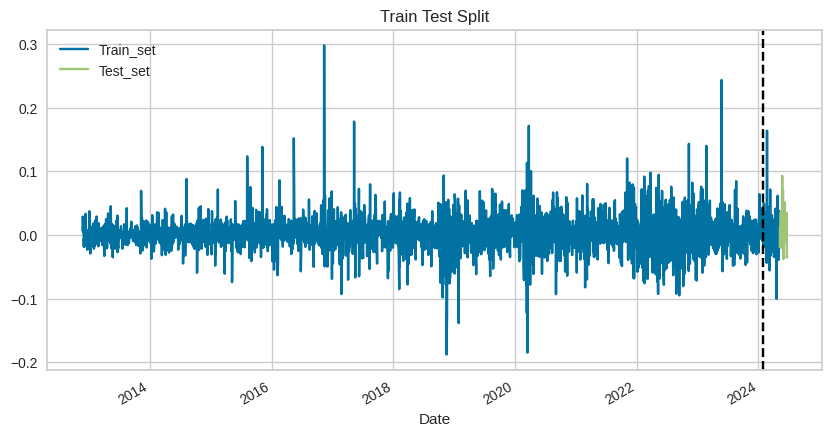

In [182]:
fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('2024-01-29', color ='Black', ls='--')
plt.legend(['Train_set', 'Test_set'])
plt.title('Train Test Split')
plt.show()

In [179]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

split_date = '2024-01-29' # based on the date of split
train_data = nvidia_data.loc[:split_date, 'Returns']
test_data = nvidia_data.loc[split_date:, 'Returns']
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Train Set'))

fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Test Set'))

# Adding a vertical line to indicate the split date
fig.add_shape(type="line", x0=split_date, x1=split_date, y0=min(nvidia_data['Returns']), y1=max(nvidia_data['Returns']),
              line=dict(color="Black", dash="dash"))

fig.update_layout(
    title='Train Test Split',
    xaxis_title='Date',
    yaxis_title='Returns',
    width=1200,  # Increased width
    height=600,  # Increased height
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    font=dict(size=18)  # Increased font size for better readability
)

fig.show()

In [160]:
auto_arima_model_ret = auto_arima(train,
                        start_p=0, start_q=0,  # Initial guess for the ARIMA order
                        max_p=5, max_q=5,  # Maximum p and q
                        seasonal=False,  # No seasonality
                        trace=True,  # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Stepwise search to find the best model

# Display the summary of the model
print(auto_arima_model_ret.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12370.568, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12377.952, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12377.585, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12376.869, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12376.585, Time=0.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12375.748, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12399.766, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12389.658, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12398.038, Time=1.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12398.009, Time=2.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12399.482, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12396.043, Time=1.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 8.907 seconds
                               SARIMAX Results                  

ARIMA (1,0,0) was found to be a better fit with lower AIC and BIC

In [162]:
# Forecasting with ARIMA model
arima_forecast = auto_arima_model_ret.predict(n_periods=len(test))

In [163]:
arima_forecast

2884    0.002667
2885    0.002393
2886    0.002411
2887    0.002410
2888    0.002410
2889    0.002410
2890    0.002410
2891    0.002410
2892    0.002410
2893    0.002410
2894    0.002410
2895    0.002410
2896    0.002410
2897    0.002410
2898    0.002410
2899    0.002410
2900    0.002410
2901    0.002410
2902    0.002410
2903    0.002410
2904    0.002410
2905    0.002410
2906    0.002410
2907    0.002410
2908    0.002410
2909    0.002410
2910    0.002410
2911    0.002410
2912    0.002410
2913    0.002410
dtype: float64

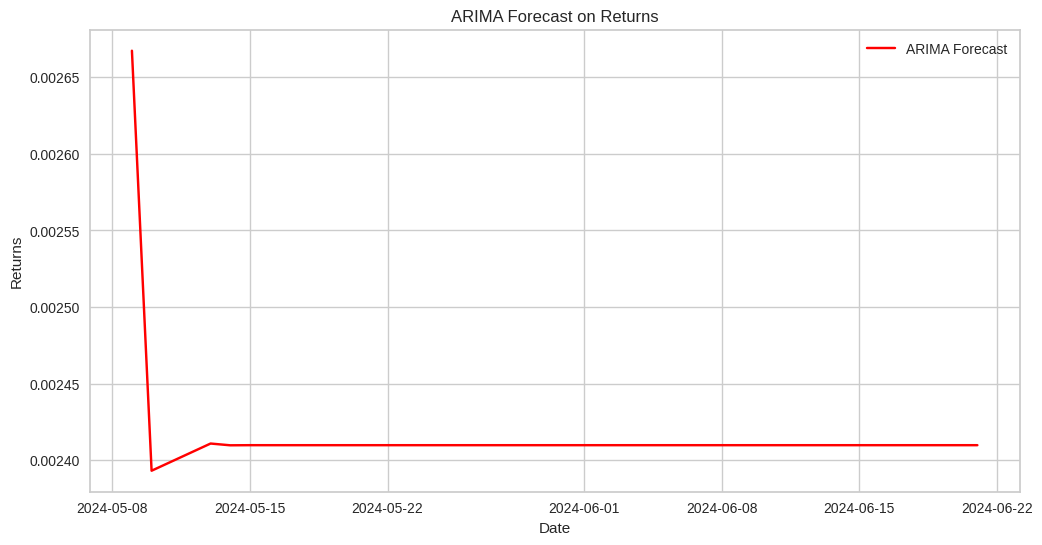

In [183]:
# Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast on Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

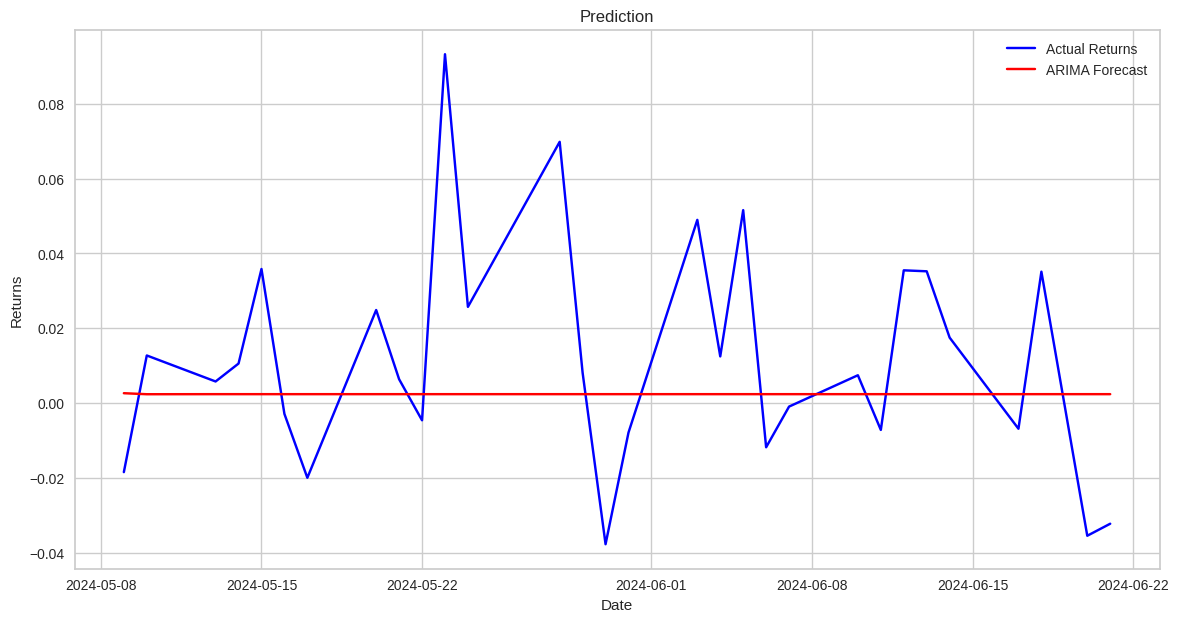

In [184]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Returns', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

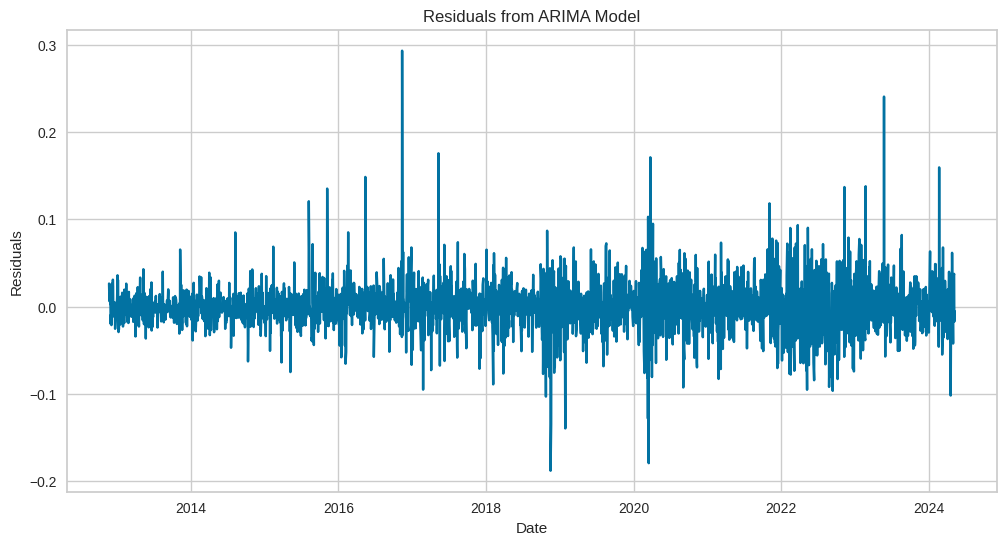

In [185]:
# Get the residuals from the ARIMA model
arima_residuals = pd.Series(auto_arima_model_ret.resid())

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(arima_residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

<Figure size 1200x600 with 0 Axes>

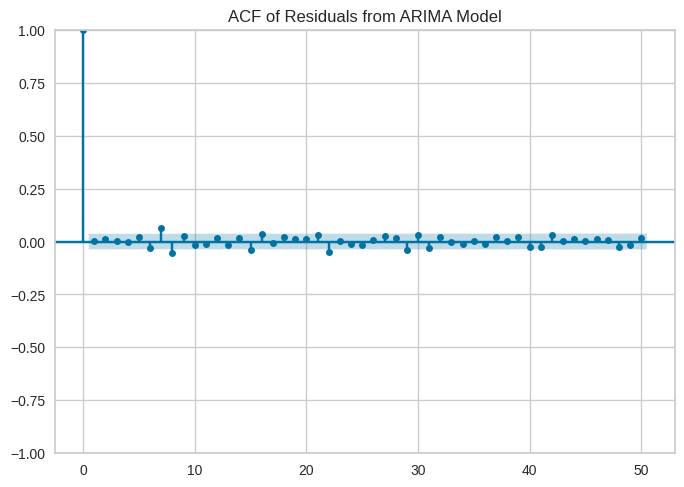

<Figure size 1200x600 with 0 Axes>

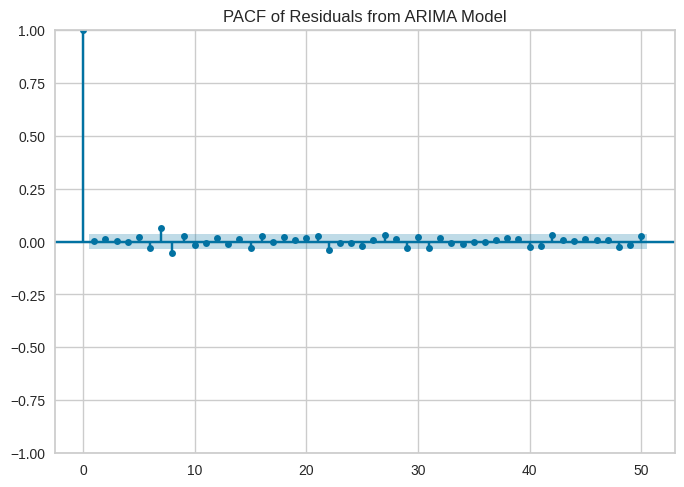

In [186]:
# Plot the ACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(arima_residuals, lags=50)
plt.title('ACF of Residuals from ARIMA Model')
plt.show()

# Plot the PACF of the residuals
plt.figure(figsize=(12, 6))
plot_pacf(arima_residuals, lags=50)
plt.title('PACF of Residuals from ARIMA Model')
plt.show()

This suggests that the residuals from the ARIMA(1,0,0) model do not exhibit significant autocorrelation, implying that the model has successfully captured the linear structure in the returns data.

Good Fit: The ARIMA(1,0,0) model seems to be a good fit for the mean process of the returns, as indicated by the lack of significant autocorrelations in the residuals.

Potential Heteroskedasticity: The residuals plot suggests some periods of higher volatility, which could be addressed by modeling the variance with a GARCH model.

Fit ARIMA Model: The ARIMA model is fitted to the returns, and residuals are extracted.
Fit GARCH Model: The GARCH model is fitted to the residuals to capture time-varying volatility.
Forecast with ARIMA: The ARIMA model forecasts the mean returns.
Forecast with GARCH: The GARCH model forecasts the volatility (standard deviation) of the returns.
Combine Forecasts: The forecasts from ARIMA and GARCH are combined to get the final forecasted returns.
Plot Forecasts: The combined forecasts are plotted.

## GARCH

Refer :[GARCH tutorial](https://fastercapital.com/content/GARCH-Modeling-in-Python--Building-Volatility-Forecasts.html)

In [168]:
# Fit a GARCH(1,1) model to the residuals
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Print the GARCH model summary
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6392.13
Distribution:                  Normal   AIC:                          -12776.3
Method:            Maximum Likelihood   BIC:                          -12752.4
                                        No. Observations:                 2884
Date:                Tue, Jul 02 2024   Df Residuals:                     2883
Time:                        09:01:42   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.4324e-04  5.423e-04      1.002      0.316 

In [169]:
# Forecasting with ARIMA model
n_periods = len(test)  # Forecast for the same length as the test set
arima_forecast = auto_arima_model_ret.predict(n_periods=n_periods)

# Forecasting with GARCH model
garch_forecast = garch_fit.forecast(horizon=n_periods)
vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Combine the forecasts (mean + volatility)
forecast = arima_forecast + vol_forecast

# Create a DataFrame for plotting
forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=test.index[0], periods=n_periods, freq='B'),
    'Forecast': forecast
})
forecast_df.set_index('Date', inplace=True)

# Plot the ARIMA-GARCH forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.title('ARIMA-GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

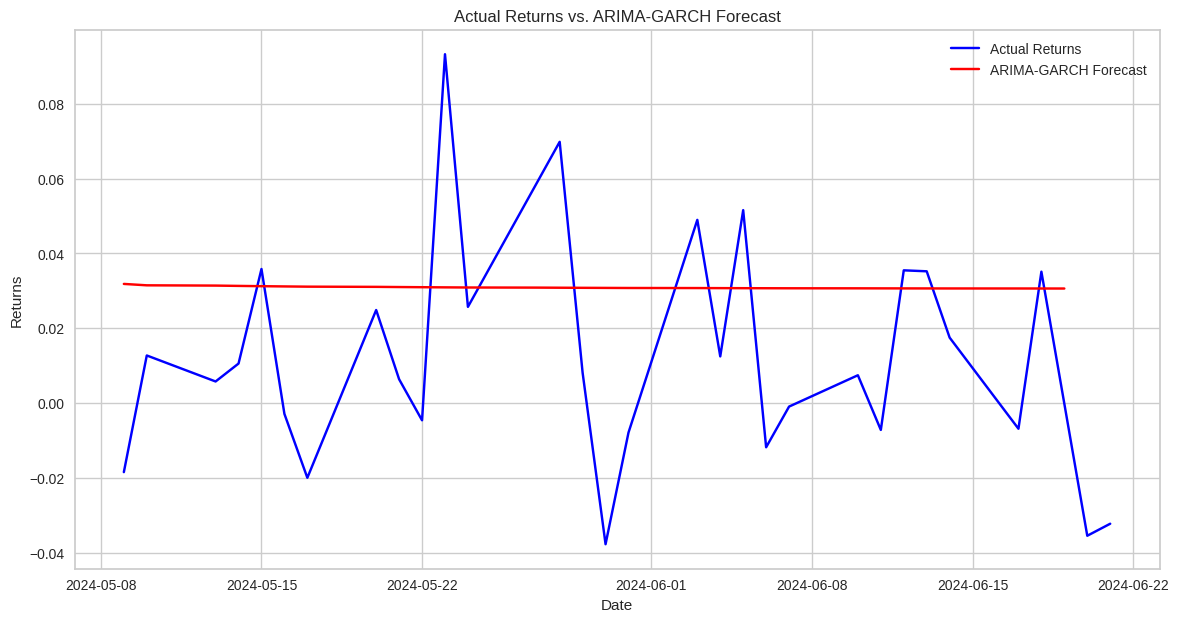

In [187]:
# Plot Actual vs. Forecasted Values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Returns', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='ARIMA-GARCH Forecast', color='red')
plt.title('Actual Returns vs. ARIMA-GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

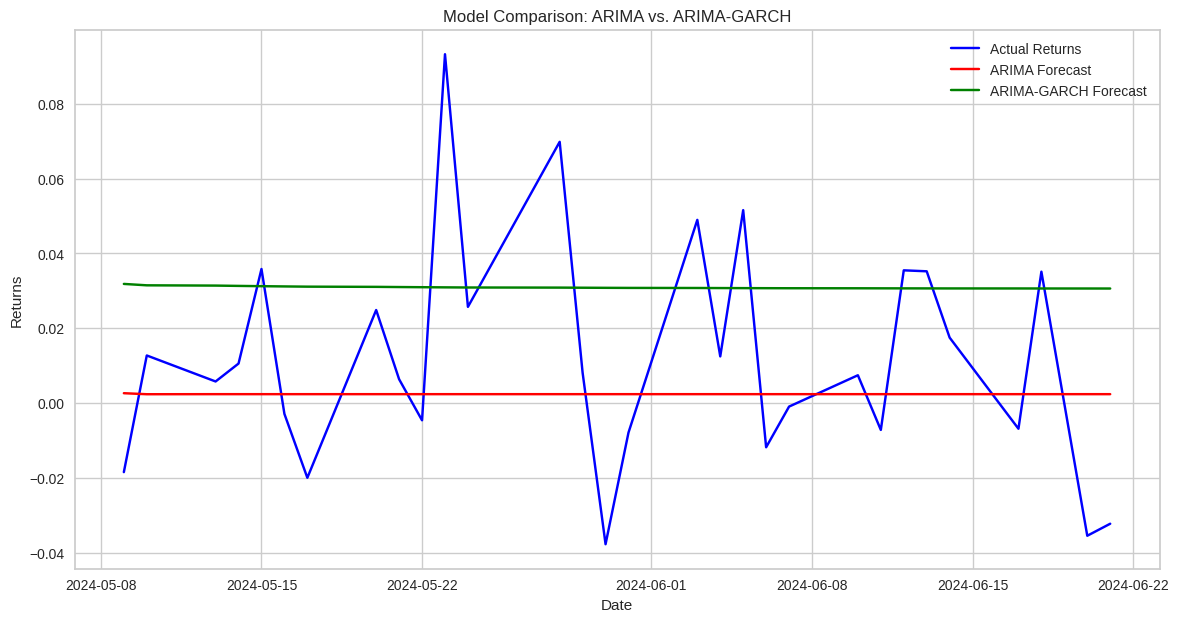

In [188]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Returns', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, forecast, label='ARIMA-GARCH Forecast', color='green')
plt.title('Model Comparison: ARIMA vs. ARIMA-GARCH')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [173]:
# Calculate performance metrics for ARIMA model
mae_arima = mean_absolute_error(test, arima_forecast)
mse_arima = mean_squared_error(test, arima_forecast)
rmse_arima = np.sqrt(mse_arima)

# Calculate performance metrics for ARIMA-GARCH model
mae_arima_garch = mean_absolute_error(test, forecast)
mse_arima_garch = mean_squared_error(test, forecast)
rmse_arima_garch = np.sqrt(mse_arima_garch)

print(f'ARIMA Model Performance:')
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')

print(f'\nARIMA-GARCH Model Performance:')
print(f'MAE: {mae_arima_garch}')
print(f'MSE: {mse_arima_garch}')
print(f'RMSE: {rmse_arima_garch}')


ARIMA Model Performance:
MAE: 0.023607729715234907
MSE: 0.000970282957192294
RMSE: 0.0311493652775188

ARIMA-GARCH Model Performance:
MAE: 0.029777280961039102
MSE: 0.0012531087566946125
RMSE: 0.035399276217101
